In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dados_mkt.csv')
df.head()

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,tenis,esportes,fofo,danca,banda,marcha,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,10,0,0,0,0,0,0,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,0,30,0,60,0,0,0,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,0,0,0,0,0,10,0,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0


## Aplicando o Encoder:

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
encoder = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output=False)

In [10]:
encoded_sex = encoder.fit_transform(df[['sexo']])
encoded_sex

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [17]:
encoded_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['sexo']))

In [19]:
dados = pd.concat([df, encoded_df], axis=1).drop(columns='sexo')
dados.head()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,tenis,esportes,fofo,danca,banda,marcha,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,0,0,0,0,0,0,10,20,40,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,30,0,60,0,0,0,10,0,50,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,0,0,0,0,10,0,10,10,0,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0.0,1.0,0.0


In [21]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Desenvolvendo o Modelo:

In [25]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2, random_state=45)

In [27]:
mod_kmeans.fit(dados)

KMeans(n_clusters=2, random_state=45)

## Avaliando o K-means:

In [30]:
mod_kmeans.inertia_

24912957.59458855

In [32]:
from sklearn.metrics import silhouette_score

silhouette_score(dados, mod_kmeans.predict(dados))

0.3799715886302017

## Avaliando Métricas Para Diferentes K:

In [35]:
def avaliacao(dados):
    inercia = []
    silhueta = []

    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(dados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'K= {k} - '+ str(silhouette_score(dados, kmeans.predict(dados))))
    return silhueta, inercia 

In [37]:
silhueta, inercia = avaliacao(dados)

In [39]:
silhueta

['K= 2 - 0.3799715886302017',
 'K= 3 - 0.26336533992350003',
 'K= 4 - 0.27496293682984085',
 'K= 5 - 0.18177512117687558',
 'K= 6 - 0.14023791347600795',
 'K= 7 - 0.15087750672816977',
 'K= 8 - 0.14485155598226213',
 'K= 9 - 0.15380316405711156',
 'K= 10 - 0.15739806038400828',
 'K= 11 - 0.15954140365508138',
 'K= 12 - 0.15880871312670258',
 'K= 13 - 0.16173447227464827',
 'K= 14 - 0.15069368311390585',
 'K= 15 - 0.15018988258074092',
 'K= 16 - 0.14689431555362978',
 'K= 17 - 0.15711735057842932',
 'K= 18 - 0.1415340096272345',
 'K= 19 - 0.12723731668906194',
 'K= 20 - 0.12821626245067802']

In [41]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 2 clusters: 0.380


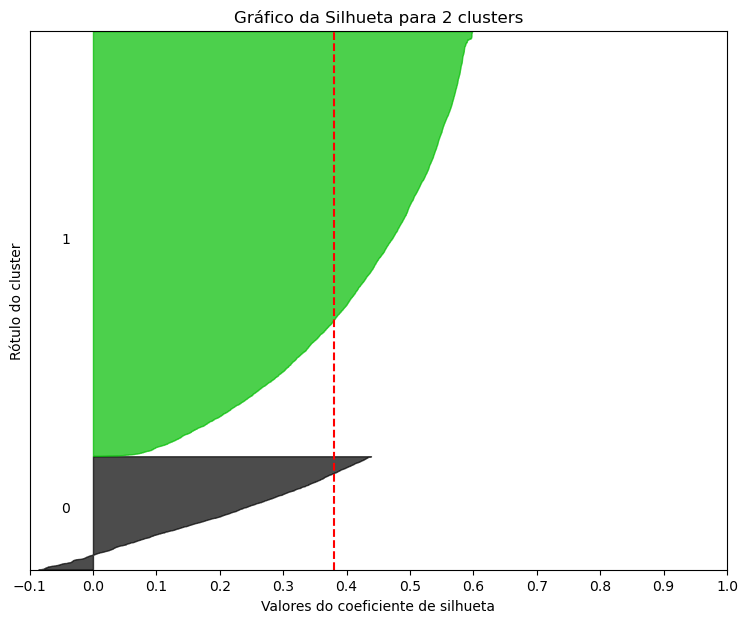

In [45]:
import numpy as np
graf_silhueta(2,dados)

In [47]:
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

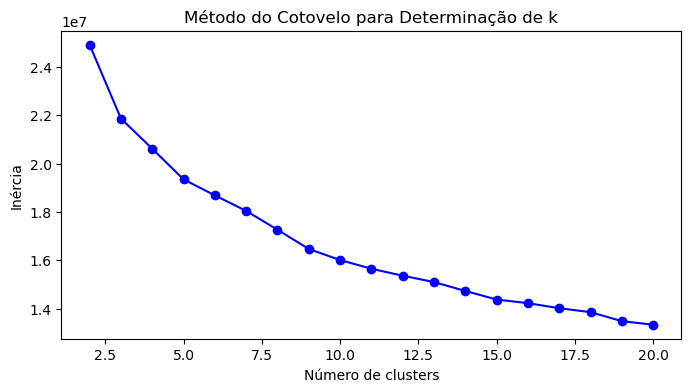

In [49]:
plot_cotovelo(inercia)

## Normalização dos Dados:

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dados_normali = scaler.fit_transform(dados)
dados_normali

array([[0.66666667, 0.08099174, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.0677686 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.55555556, 0.00165289, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.05289256, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.03305785, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.04132231, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [54]:
dados_normali = pd.DataFrame(dados_normali, columns=dados.columns)
dados_normali.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,tenis,esportes,fofo,danca,banda,marcha,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,0.004996,0.015096,0.008560,0.006717,0.013675,0.026890,0.017008,0.012774,0.005379,0.036424,0.015522,0.023487,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133,0.761469,0.166256,0.072275
std,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,0.018910,0.067208,0.039706,0.037721,0.041938,0.061382,0.042733,0.042363,0.035318,0.054036,0.043547,0.054875,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153,0.426202,0.372325,0.258953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.043478,0.000000,0.047619,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Verificando as Métricas para os novos dados:

In [59]:
silhueta, inercia = avaliacao(dados_normali)
silhueta

['K= 2 - 0.6684575483061148',
 'K= 3 - 0.7447500875317523',
 'K= 4 - 0.31770806832478643',
 'K= 5 - 0.31340331188785564',
 'K= 6 - 0.22158883123808573',
 'K= 7 - 0.18065447619224162',
 'K= 8 - 0.2632530174568145',
 'K= 9 - 0.18941462442926804',
 'K= 10 - 0.17278659156658732',
 'K= 11 - 0.17586581766443002',
 'K= 12 - 0.1748588425448229',
 'K= 13 - 0.15849728628912893',
 'K= 14 - 0.16113548558536306',
 'K= 15 - 0.12028865152974252',
 'K= 16 - 0.12098817658876286',
 'K= 17 - 0.12266587168696493',
 'K= 18 - 0.12630226756889815',
 'K= 19 - 0.14734604036350954',
 'K= 20 - 0.14705213351465216']

Valor médio para 3 clusters: 0.745


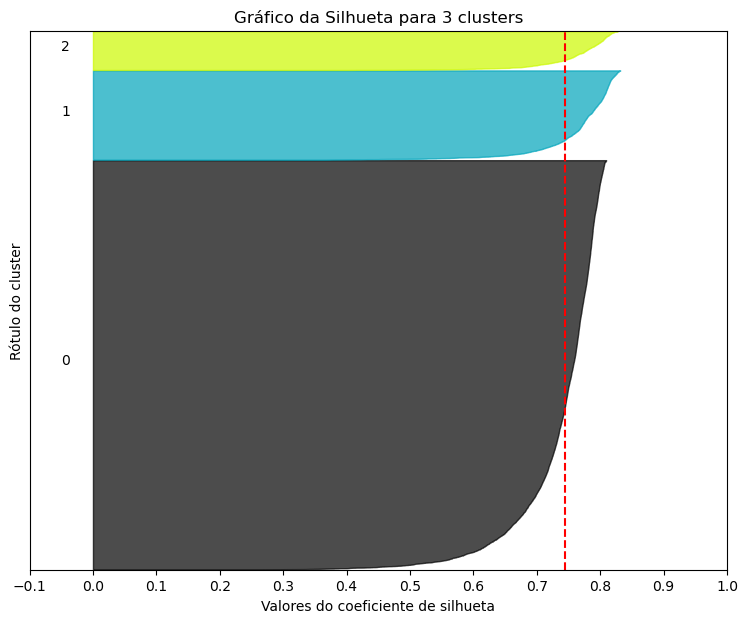

In [61]:
graf_silhueta(3, dados_normali)

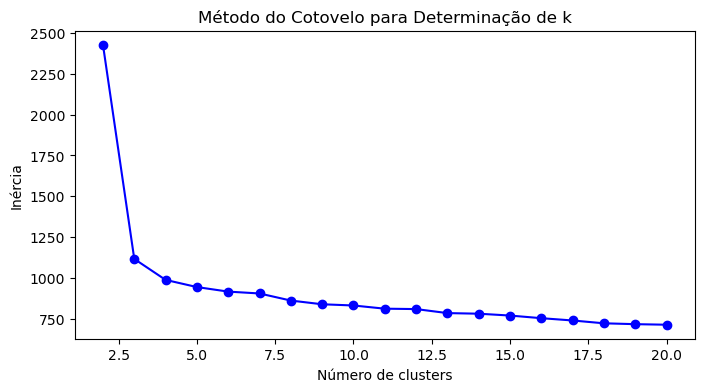

In [63]:
plot_cotovelo(inercia)

## Criando o Melhor Modelo:

In [66]:
modelo_kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
modelo_kmeans.fit(dados_normali)

KMeans(n_clusters=3, random_state=45)

In [68]:
joblib.dump(modelo_kmeans, 'kmeans.pkl')

['kmeans.pkl']

## Analisando as informações de cada cluster:

In [71]:
dados_analise = pd.DataFrame()

dados_analise[dados_normali.columns] = scaler.inverse_transform(dados_normali)
dados_analise

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,tenis,esportes,fofo,danca,banda,marcha,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27.0,49.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
1,27.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,40.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,26.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,30.0,0.0,60.0,0.0,0.0,0.0,10.0,0.0,50.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,32.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
12988,26.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12989,27.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12990,27.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
dados_analise['cluster'] = modelo_kmeans.labels_

In [77]:
cluster_media = dados_analise.groupby('cluster').mean()
cluster_media.T

cluster,0,1,2
idade,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquete,2.959668,3.763889,2.545261
futebol_americano,2.462347,5.347222,2.257721
futebol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacao,1.693116,0.976852,1.341853
animacao,1.441423,0.092593,1.309904
beisebol,0.792480,3.231481,0.798722


In [79]:
cluster_media = cluster_media.transpose()
cluster_media.columns = [0,1,2]
cluster_media

,0,1,2
idade,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquete,2.959668,3.763889,2.545261
futebol_americano,2.462347,5.347222,2.257721
futebol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacao,1.693116,0.976852,1.341853
animacao,1.441423,0.092593,1.309904
beisebol,0.792480,3.231481,0.798722


## Descrevendo cada agrupamento:

In [90]:
cluster_media[[0]].sort_values(by=0, ascending=False)

,0
numero_de_amigos,32.382796
idade,26.787830
musica,8.541393
cabelo,5.626200
danca,5.463459
compras,4.943900
fofo,4.413221
banda,3.368038
shopping,3.260892
basquete,2.959668


**Insigt class 0:** Esse grupo é referente as mulheres, e as caractristicas mais relevantes são música, cabelo, entretenimento.
As campanhas para esse grupo pode ser focado em beleza, entretenimento, vertuário, compras.

In [95]:
cluster_media[[1]].sort_values(by=1, ascending=False)

,1
idade,27.031944
numero_de_amigos,26.173611
musica,8.180556
futebol_americano,5.347222
banda,4.120370
basquete,3.763889
beisebol,3.231481
rock,3.148148
futebol,2.592593
danca,2.578704


**insight calsse 1:** As campanhas para o público Masculino, deve ser focado em música, esporte.

In [99]:
cluster_media[[2]].sort_values(by=2, ascending=False)

,2
numero_de_amigos,31.460064
idade,27.123536
musica,7.103301
danca,4.749734
cabelo,4.345048
fofo,3.642173
compras,3.365282
shopping,3.045793
banda,2.758253
basquete,2.545261


**insight classe 2:** publicidade voltada para música, compras, beleza.